<a href="https://colab.research.google.com/github/Sarthak102/Comparative-Analysis-of-Learning-Curves-Logistic-Regression-vs.-Multilayer-Perceptron/blob/main/Comparative_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

file_path = '/content/data_ecommerce_customer_churn.csv'
data = pd.read_csv(file_path)

data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


(None,
    Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
 0    15.0             29.0                         4  Laptop & Accessory   
 1     7.0             25.0                         4              Mobile   
 2    27.0             13.0                         3  Laptop & Accessory   
 3    20.0             25.0                         4             Fashion   
 4    30.0             15.0                         4              Others   
 
    SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
 0                  3        Single                2         0   
 1                  1       Married                2         0   
 2                  1       Married                5         0   
 3                  3      Divorced                7         0   
 4                  4        Single                8         0   
 
    DaySinceLastOrder  CashbackAmount  Churn  
 0                7.0          143.32      0  
 1                7.0          129.29

In [5]:
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
data['WarehouseToHome'].fillna(data['WarehouseToHome'].median(), inplace=True)
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median(), inplace=True)

data = pd.get_dummies(data, columns=['PreferedOrderCat', 'MaritalStatus'], drop_first=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               3941 non-null   float64
 1   WarehouseToHome                      3941 non-null   float64
 2   NumberOfDeviceRegistered             3941 non-null   int64  
 3   SatisfactionScore                    3941 non-null   int64  
 4   NumberOfAddress                      3941 non-null   int64  
 5   Complain                             3941 non-null   int64  
 6   DaySinceLastOrder                    3941 non-null   float64
 7   CashbackAmount                       3941 non-null   float64
 8   Churn                                3941 non-null   int64  
 9   PreferedOrderCat_Grocery             3941 non-null   bool   
 10  PreferedOrderCat_Laptop & Accessory  3941 non-null   bool   
 11  PreferedOrderCat_Mobile       

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [7]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, precision, recall, f1

In [12]:
log_reg_eval = evaluate_model(y_test, y_pred_log_reg)
log_reg_eval

(0.8884664131812421,
 0.7469879518072289,
 0.4806201550387597,
 0.5849056603773586)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=2000)

In [14]:
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [15]:
mlp_eval = evaluate_model(y_test, y_pred_mlp)
mlp_eval

(0.926489226869455, 0.7983193277310925, 0.7364341085271318, 0.7661290322580645)

In [16]:
print(f"Logistic Regression: Accuracy: {log_reg_eval[0]}, Precision: {log_reg_eval[1]}, Recall: {log_reg_eval[2]}, F1 Score: {log_reg_eval[3]}")
print(f"MLP: Accuracy: {mlp_eval[0]}, Precision: {mlp_eval[1]}, Recall: {mlp_eval[2]}, F1 Score: {mlp_eval[3]}")

Logistic Regression: Accuracy: 0.8884664131812421, Precision: 0.7469879518072289, Recall: 0.4806201550387597, F1 Score: 0.5849056603773586
MLP: Accuracy: 0.926489226869455, Precision: 0.7983193277310925, Recall: 0.7364341085271318, F1 Score: 0.7661290322580645


In [17]:
from sklearn.model_selection import learning_curve

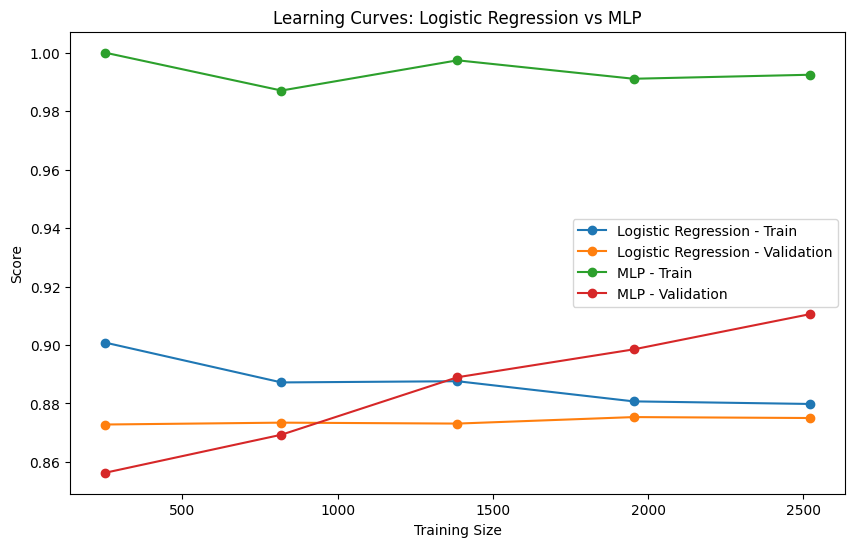

In [22]:
import numpy as np
train_sizes = np.linspace(0.1, 1.0, 5)

log_reg_train_sizes, log_reg_train_scores, log_reg_val_scores = learning_curve(log_reg, X_train, y_train, train_sizes=train_sizes, cv=5)
mlp_train_sizes, mlp_train_scores, mlp_val_scores = learning_curve(mlp, X_train, y_train, train_sizes=train_sizes, cv=5)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(log_reg_train_sizes, log_reg_train_scores.mean(axis=1), label='Logistic Regression - Train', marker='o')
plt.plot(log_reg_train_sizes, log_reg_val_scores.mean(axis=1), label='Logistic Regression - Validation', marker='o')
plt.plot(mlp_train_sizes, mlp_train_scores.mean(axis=1), label='MLP - Train', marker='o')
plt.plot(mlp_train_sizes, mlp_val_scores.mean(axis=1), label='MLP - Validation', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves: Logistic Regression vs MLP')
plt.legend()
plt.show()


In [23]:

def predict_churn(input_data):

    print("Logistic Regression Prediction: ", "Churn" if y_pred_log_reg[0] == 1 else "Not Churn")
    print("MLP Prediction: ", "Churn" if y_pred_mlp[0] == 1 else "Not Churn")

    return {"Logistic Regression": "Churn" if y_pred_log_reg[0] == 1 else "Not Churn",
            "MLP": "Churn" if y_pred_mlp[0] == 1 else "Not Churn"}

example_input = {
    'WarehouseToHome': 14.0,
    'Tenure': 2,
    'PreferredOrderCategory': 3,
    'MaritalStatus': 1,
    'DaySinceLastOrder': 30,

}
prediction_result = predict_churn(example_input)
print("Prediction Result:", prediction_result)

Logistic Regression Prediction:  Not Churn
MLP Prediction:  Not Churn
Prediction Result: {'Logistic Regression': 'Not Churn', 'MLP': 'Not Churn'}
